# Theoretical Exercises Week 4
**Like last week, it is very imporant that you try to solve every exercise. 
If you do not solve the exercise, focus on understanding the question, and try to figure out what it is you do not understand.**




# Exercise 1: Convex Functions 

See https://en.wikipedia.org/wiki/Convex_function for the definitions of convex functions.
At the lectures we saw two definitions. But there is a third one that is usually easier and is as follows.

Let $f: \mathbb{R}^n \rightarrow \mathbb{R}$ be a function that is twice differentiable.

Define the Hessian $H$ as the matrix of second order derivatives as (a matrix of shape $n \times n$):
$$H = \left[ \frac{\partial^2 f}{\partial x_i \partial x_j}\right]_{i,j}$$

A function f is convex if $H$ is a Positive Semidefinite Matrix (PSD) which is the case if $\forall x\in \mathbb{R}^n$,  $ x^\intercal H x \geq 0  $ 

For a function $f: \mathbb{R} \rightarrow \mathbb{R}$ the Hessian is $H = f''$, and the condition says that $\forall x: f''(x) \geq 0$.




Which of the following functions are convex on ${\mathbb R}$? 

-   $f(x) = 2$

-   $f(x) = -\ln (x), x>0$

-   $f(x) = x^3$

-   $f(x) = x^2 + x^4$


**hint: use the newly defined definition to determine convexity**

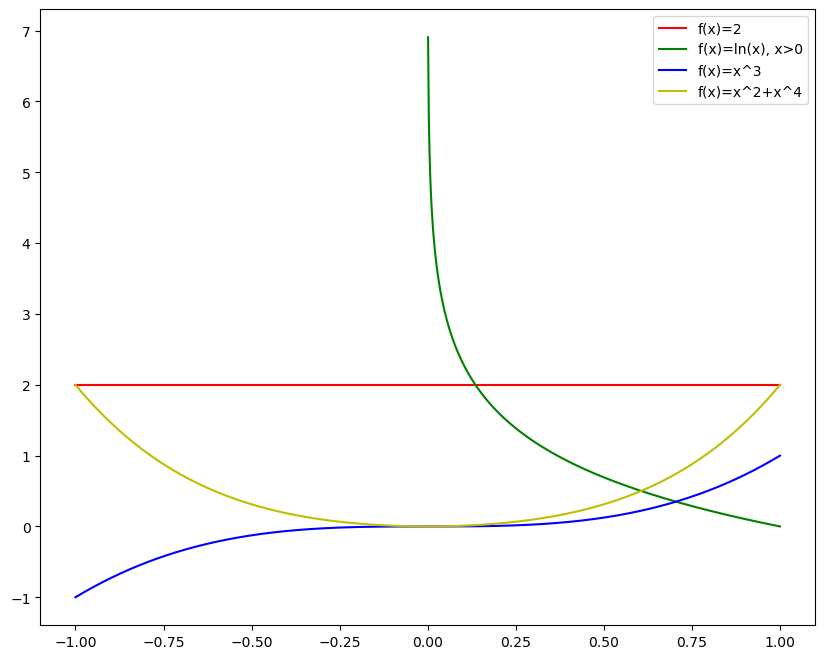

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Lets plot them
x = np.linspace(-1, 1, 1000)
xp = x[x>0]
plt.figure(figsize=(10,8))
plt.plot(x, [2 for y in x], 'r-', label='f(x)=2')
plt.plot(xp, [-np.log(z) for z in xp], 'g-', label='f(x)=ln(x), x>0')
plt.plot(x, x**3, 'b-', label='f(x)=x^3')
plt.plot(x, x**2 + x**4, 'y-', label='f(x)=x^2+x^4')
plt.legend()
plt.show()

# Exercise 2: Convexity of Linear Regression Cost Funtion
In this exercise your job is to prove that the cost function for linear regression is convex.
**Prove that the function $E_\mathrm{in}(w) = \frac{1}{n} \|Xw -y\|^2$ is convex.** 



- Hint 1: Prove that for all matrices $A$, it holds that $A^\intercal A$ is Positive Semidefinite. 
- Hint 2: Compute the Hessian of $E_\mathrm{in}(w)$ 


# Exercise 3: Gradient Descent 
Let $f_a(x_1, x_2) = \frac{1}{2}(x_1^2 + a\cdot x_2^2)$

Where $a$ is parameter that we will change.

**Your task is to write a gradient descent algorithm that finds a minimizer of $f$, where we have decided that the starting point for the gradient descent is (256, 1). It should be possible for you to figure out what the local (global) minimum is, as well as the gradient.**
- Test your algorithm by running the cell.
- run your gradient descent algorithm for at least 40 steps to see if it converges. 
You must save the sequence of elements (2d points) considered in your gradient descent algorithm for visualization. 
We have added code to visualize this sequence.

- Try a=1, 4, 16, 64, 128, 256 and adjust the step size to see if you can make it converge.
    **hint - after trying different values for the stepsize also try approximately 1/a (for a > 1)**
- What do you see? 




In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(a, x):
    return 0.5 * (x[0]**2 + a * x[1]**2)

def visualize(a, path, ax=None):
    """
    Make contour plot of f_a and plot the path on top of it
    """
    y_range = 10
    x = np.arange(-257, 257, 0.1)
    y = np.arange(-y_range, y_range, 0.1)
    xx, yy = np.meshgrid(x, y)
    z = 0.5 * (xx**2 + a * yy**2)
    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 13))
    h = ax.contourf(xx, yy, z, cmap=plt.get_cmap('jet'))
    ax.plot([x[0] for x in path], [x[1] for x in path], 'w.--', markersize=4)
    ax.plot([0], [0], 'rs', markersize=8) # optimal solution
    ax.set_xlim([-257, 257])
    ax.set_ylim([-y_range, y_range])

def gd(a, step_size=0.1, steps=40):
    """ Run Gradient descent
        params:
        a - the parameter that define the function f
        step_size - constant stepsize to use for gradient descent
        steps - number of steps to run
        
        Returns: out, list with the sequence of points considered during the descent.         
    """
    out = []
    x = np.array([256.0, 1.0]) # starting point

    ### YOUR CODE HERE    
    ### END CODE
    return out

fig, axes = plt.subplots(2, 3, figsize=(20, 16))
ateam = [[1, 4, 16], [64, 128, 256]]
for i in range(2):
    for j in range(3):
        ax = axes[i][j]
        a = ateam[i][j]
        path = gd(a, step_size=0.1, steps=40) # use good step size here instead of standard value
        visualize(a, path, ax)
        ax.set_title('Gradient Descent a={0}'.format(a), fontsize=16)


## Exercise 4:  Show that the cost function for Logistic Regression is convex
### Try at least the first part. Do the second part after coding exercises if time.

In class we derived the loss function for logistic regression based on negative log likelihood. The loss function was as follows:
$$
E_{in}(w) = - \frac{1}{n}\sum_{i=1}^n \ln(\sigma(y_i w^\intercal x_i)) = \frac{1}{n}\sum_{i=1}^n \ln(1 + e^{-y_i w^\intercal x_i})
$$
where $\sigma(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function with derivative $\frac{\partial \sigma}{\partial z} = \sigma(z)\sigma(-z)$.


We need to prove that $E_{in}(w)$ is a convex function (data X, y fixed as usual).
A sum of convex functions is convex so we can ignore the sum and focus on just one element. Similarly, the factor $1/n$ does not change convexity. Thus it suffices to show that
$$
f(w) = -\ln(\sigma(y w^\intercal x))
$$
is a convex function (of $w$) for any fixed $x$ and $y$.



We will do this in simple steps. First let us assume that x and w are 1D vectors i.e. numbers.
To prove that $f$ is convex we can prove that $f''(w) \geq 0$ for all $w$.
* Step 1. Prove that $f'(w) = -\sigma(-ywx)yx$.
* Step 2. Prove that $f''(w) =  x^2 \sigma(yw x)\sigma (-yw x)$.
* Step 3. Argue that $f''(w) \geq 0$ for all w


To generalize this to d-dimensional $w$ and $x$, we do the same steps, just with partial derivates. 

* Step 1. Show that $\partial f/\partial w_i = -\sigma(-yw^\intercal x)yx_i$.

The Hessian matrix is the second order matrix of derivatives.

* Step 2. Show that the Hessian of f is $\sigma(yw^\intercal x) \sigma(-yw^\intercal x) x x^\intercal$ (note that this is an outer product) 

* Step 3. Show that $\sigma(yw^\intercal x) \sigma(-yw^\intercal x) x x^\intercal$ is a Positive Semidefinite Matrix





# BONUS Exercise if Time 5: Softmax Gradient
As described in the softmax note, we define the softmax function as follows:
$$
\textrm{softmax}:\mathbb{R}^K \rightarrow \mathbb{R}^K, \quad
\textrm{softmax}(x)_j =
\frac{e^{x_j}}
{\sum_{i=1}^K e^{x_i}}\quad
\textrm{ for }\quad j = 1, \dots, K.
$$
where  $\textrm{softmax}(x)_j$ denote the $j$'th output of the function


Show that the matrix of derivatives of the softmax function is as follows.
$$
\left[\frac{\partial \textrm{softmax}}{\partial x}\right]_{i,j} =
\frac
{\partial \;\textrm{softmax}(x)_i}
{\partial x_j} =
(\delta_{i,j} - \textrm{softmax}(x)_j)
\textrm{softmax}(x)_i\quad\quad\text{where}\quad\quad
\delta_{ij}=\begin{cases}1 &\text{if }i=j\\
0 & \text{else}
\end{cases}
$$
